In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2, 1))

In [3]:
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
x = tf.zeros(shape=(2, 1))

In [5]:
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [6]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)

In [7]:
print(x)

tf.Tensor(
[[-0.2750293]
 [ 0.4748239]
 [-1.0751883]], shape=(3, 1), dtype=float32)


In [8]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)

In [9]:
print(x)

tf.Tensor(
[[0.0659287 ]
 [0.99502504]
 [0.87727547]], shape=(3, 1), dtype=float32)


In [10]:
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0.

A significant difference between NumPy arrays and TensorFlow tensors is that Tensor- Flow tensors aren’t assignable: they’re constant. For instance, in NumPy, you can do the following.

In [11]:
x = tf.ones(shape=(2, 2))
# x[0, 0] = 0.0

In [12]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))

In [13]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.06828009],
       [-0.895856  ],
       [ 0.02747006]], dtype=float32)>


In [14]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [15]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [16]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [17]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e += d

In [18]:
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [19]:
input_var = tf.Variable(initial_value=3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [20]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [21]:
time = tf.Variable(0.)  # 定义时间变量，初始值为 0
with tf.GradientTape() as outer_tape:  # 外层梯度带，用于计算加速度
    with tf.GradientTape() as inner_tape:  # 内层梯度带，用于计算速度
        position = 4.9 * time ** 2  # 定义位置公式 s = 4.9 * t^2
    speed = inner_tape.gradient(position, time)  # 计算速度 v = ds/dt
acceleration = outer_tape.gradient(speed, time)  # 计算加速度 a = dv/dt


In [22]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [23]:
print(negative_samples.shape)
print(positive_samples.shape)

(1000, 2)
(1000, 2)


In [24]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)

(2000, 2)


In [25]:
targets = np.vstack(
    (
        np.zeros((num_samples_per_class, 1), dtype="float32"),
        np.ones((num_samples_per_class, 1), dtype="float32"),
    )
)
print(targets.shape)

(2000, 1)


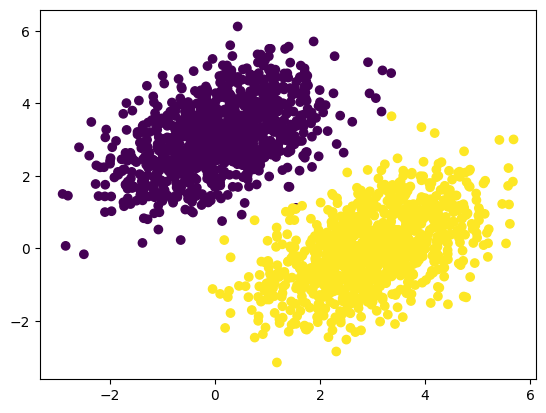

In [26]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0],
            inputs[:, 1], c=targets[:, 0])
plt.show()

In [27]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [28]:
def model(inputs):
    return tf.matmul(inputs, W) + b

$$
reduce\_mean(input\_tensor) = \frac{1}{N}\Sigma_{i=1}^{N}x_i
$$

In [29]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [30]:
learning_rate = 0.1

In [31]:
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [32]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.4612
Loss at step 1: 0.2983
Loss at step 2: 0.1394
Loss at step 3: 0.1084
Loss at step 4: 0.0980
Loss at step 5: 0.0912
Loss at step 6: 0.0855
Loss at step 7: 0.0803
Loss at step 8: 0.0756
Loss at step 9: 0.0713
Loss at step 10: 0.0673
Loss at step 11: 0.0637
Loss at step 12: 0.0604
Loss at step 13: 0.0573
Loss at step 14: 0.0546
Loss at step 15: 0.0520
Loss at step 16: 0.0497
Loss at step 17: 0.0476
Loss at step 18: 0.0456
Loss at step 19: 0.0438
Loss at step 20: 0.0422
Loss at step 21: 0.0407
Loss at step 22: 0.0393
Loss at step 23: 0.0381
Loss at step 24: 0.0369
Loss at step 25: 0.0359
Loss at step 26: 0.0349
Loss at step 27: 0.0340
Loss at step 28: 0.0332
Loss at step 29: 0.0325
Loss at step 30: 0.0318
Loss at step 31: 0.0312
Loss at step 32: 0.0306
Loss at step 33: 0.0301
Loss at step 34: 0.0296
Loss at step 35: 0.0292
Loss at step 36: 0.0288
Loss at step 37: 0.0284
Loss at step 38: 0.0281
Loss at step 39: 0.0278


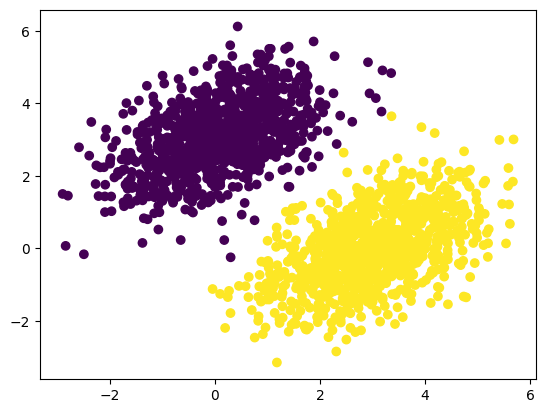

In [33]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

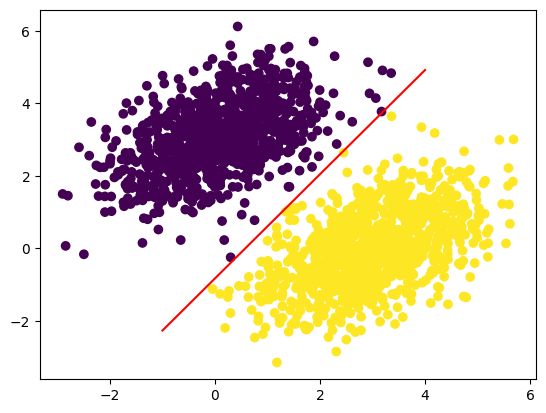

In [34]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## A Dense layer implemented as a Layer subclass

In [41]:
from tensorflow import keras


class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(
            shape=(input_dim, self.units),
            initializer="random_normal"
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer="zeros"
        )

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [42]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)

In [43]:
input_tensor = tf.ones(shape=(2, 784))

In [44]:
output_tensor = my_dense(input_tensor)

In [45]:
print(output_tensor.shape)

(2, 32)


In [46]:
from tensorflow.keras import layers

layer = layers.Dense(32, activation="relu")

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [49]:
model = keras.Sequential([keras.layers.Dense(1)])

In [50]:
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [52]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    # optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [53]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.4979 - loss: 21.1277  
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.4802 - loss: 19.9857 
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.4877 - loss: 19.5290 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.4834 - loss: 18.5115 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5002 - loss: 17.7922 


In [54]:
history.history

{'binary_accuracy': [0.4894999861717224,
  0.4894999861717224,
  0.48899999260902405,
  0.4880000054836273,
  0.4884999990463257],
 'loss': [20.58243751525879,
  19.860980987548828,
  19.245473861694336,
  18.65522575378418,
  18.07316017150879]}

In [55]:
model = keras.Sequential([keras.layers.Dense(1)])

In [56]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [58]:
indices_permutation = np.random.permutation(len(inputs))
print(indices_permutation)
print(indices_permutation.shape)



[ 888 1046 1299 ... 1173  372  506]
(2000,)


In [61]:
shuffled_inputs = inputs[indices_permutation]
print(shuffled_inputs)
print(shuffled_inputs.shape)

[[-0.08034026  1.3216777 ]
 [ 4.918626    0.14745249]
 [ 1.9938844   0.07315377]
 ...
 [ 2.3658686  -1.1212759 ]
 [ 1.131467    3.7100432 ]
 [-0.5762876   3.246121  ]]
(2000, 2)


In [62]:
shuffled_targets = targets[indices_permutation]
print(shuffled_targets)
print(shuffled_targets.shape)

[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]]
(2000, 1)


In [63]:
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
train_inputs = shuffled_inputs[num_validation_samples:]
train_targets = shuffled_targets[num_validation_samples:]

In [64]:
model.fit(
    train_inputs,
    train_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9180 - loss: 0.7337 - val_binary_accuracy: 0.8783 - val_loss: 0.1253
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - binary_accuracy: 0.9531 - loss: 0.0811 - val_binary_accuracy: 0.9967 - val_loss: 0.0285
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - binary_accuracy: 0.9573 - loss: 0.0724 - val_binary_accuracy: 0.9967 - val_loss: 0.0340
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - binary_accuracy: 0.9627 - loss: 0.0667 - val_binary_accuracy: 0.9900 - val_loss: 0.0468
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - binary_accuracy: 0.9534 - loss: 0.0674 - val_binary_accuracy: 0.9817 - val_loss: 0.0441


In [65]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.9824 - loss: 0.0440 


In [71]:
new_inputs = np.random.random((16, 2))
predictions = model(new_inputs)

In [72]:
predictions = model.predict(new_inputs, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [73]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 0.24876904]
 [ 0.9988109 ]
 [ 0.68756527]
 [ 1.0384321 ]
 [ 0.80090535]
 [ 0.7979035 ]
 [ 0.6383912 ]
 [ 0.734487  ]
 [ 0.58246887]
 [-0.00841185]]
